# Data Import

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
dataset_path = '/kaggle/input/sncb-remote-diagnostics-in-fleet-maintenance/ar41_for_ulb.csv'

# Check if the file exists before trying to read it
if os.path.exists(dataset_path):
    data = pd.read_csv(dataset_path, delimiter=';')

    # Display the basic information and the first few rows of the dataframe
    data_info = data.info()
    data_head = data.head()

    # If you want to print the information to the console
    print(data_info)
    print(data_head)
else:
    print(f"The file {dataset_path} does not exist.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17679273 entries, 0 to 17679272
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   mapped_veh_id       float64
 2   timestamps_UTC      object 
 3   lat                 float64
 4   lon                 float64
 5   RS_E_InAirTemp_PC1  float64
 6   RS_E_InAirTemp_PC2  float64
 7   RS_E_OilPress_PC1   float64
 8   RS_E_OilPress_PC2   float64
 9   RS_E_RPM_PC1        float64
 10  RS_E_RPM_PC2        float64
 11  RS_E_WatTemp_PC1    float64
 12  RS_E_WatTemp_PC2    float64
 13  RS_T_OilTemp_PC1    float64
 14  RS_T_OilTemp_PC2    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 2.0+ GB
None
   Unnamed: 0  mapped_veh_id       timestamps_UTC        lat       lon  \
0           0          181.0  2023-08-01 03:44:12  50.769818  3.872114   
1           1          143.0  2023-08-01 06:36:29  51.039993  3.693429   
2           2          183.0  2023

# Data Exploration

In [3]:
column_names = data.columns.tolist()
print(column_names)

['Unnamed: 0', 'mapped_veh_id', 'timestamps_UTC', 'lat', 'lon', 'RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2']


In [4]:
print(data.dtypes)

Unnamed: 0              int64
mapped_veh_id         float64
timestamps_UTC         object
lat                   float64
lon                   float64
RS_E_InAirTemp_PC1    float64
RS_E_InAirTemp_PC2    float64
RS_E_OilPress_PC1     float64
RS_E_OilPress_PC2     float64
RS_E_RPM_PC1          float64
RS_E_RPM_PC2          float64
RS_E_WatTemp_PC1      float64
RS_E_WatTemp_PC2      float64
RS_T_OilTemp_PC1      float64
RS_T_OilTemp_PC2      float64
dtype: object


## Explore Numeric Data

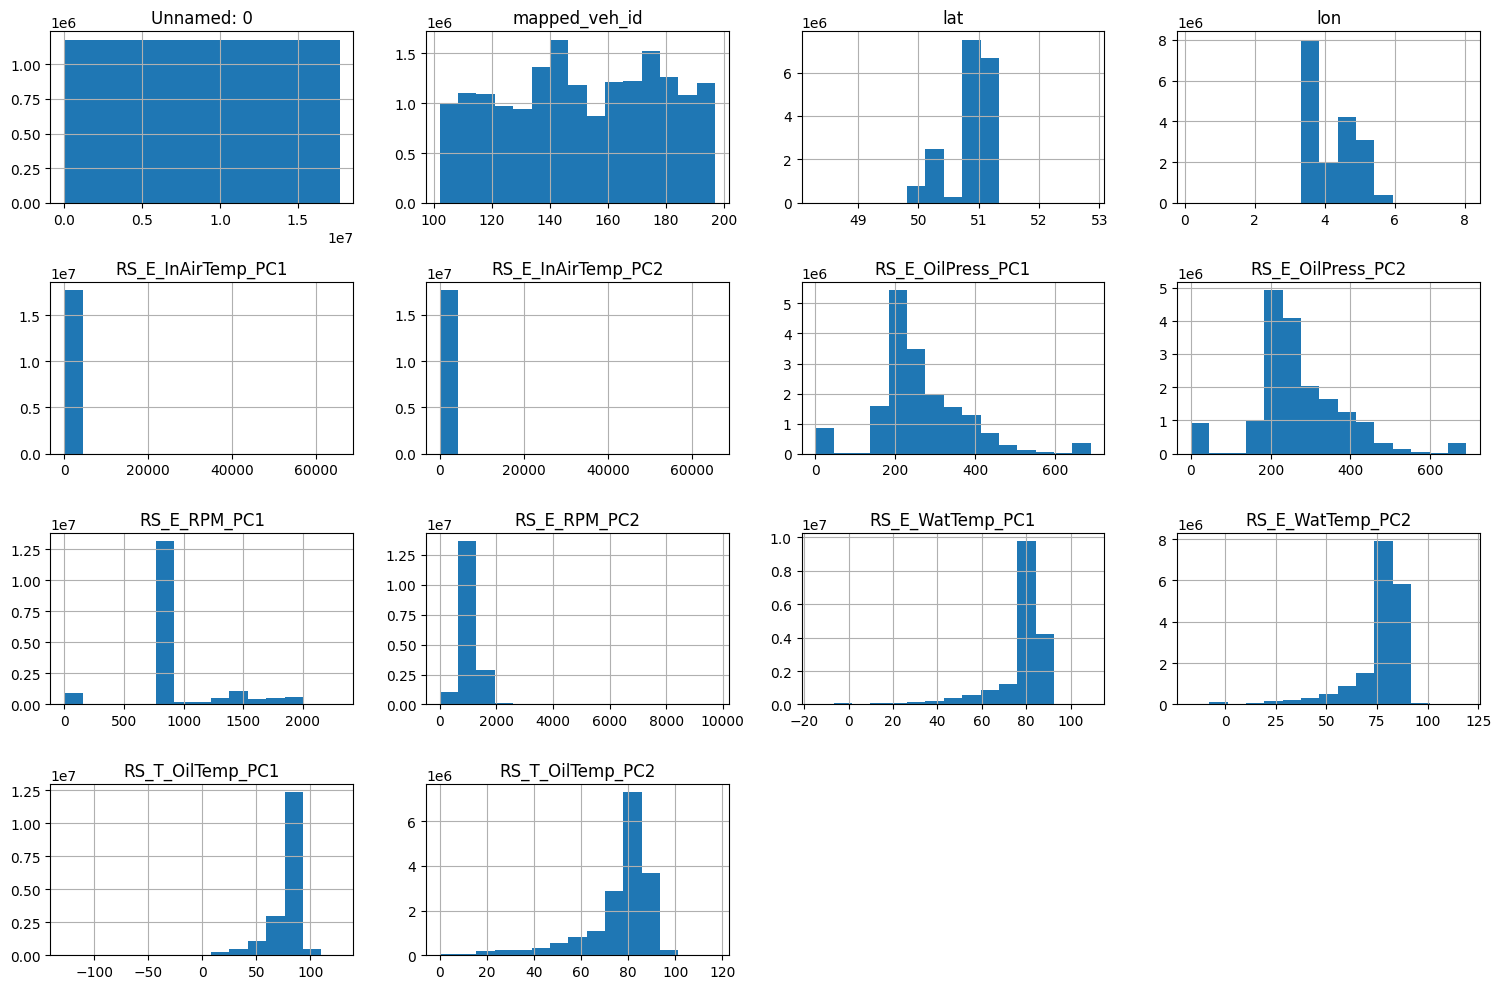

statistical_summary
          Unnamed: 0  mapped_veh_id           lat           lon  \
count  1.767927e+07   1.767927e+07  1.767927e+07  1.767927e+07   
mean   8.839636e+06   1.508423e+02  5.087641e+01  4.228568e+00   
std    5.103567e+06   2.694316e+01  3.133396e-01  5.981553e-01   
min    0.000000e+00   1.020000e+02  4.829568e+01  1.750491e-01   
25%    4.419818e+06   1.280000e+02  5.077065e+01  3.715411e+00   
50%    8.839636e+06   1.510000e+02  5.100253e+01  3.873272e+00   
75%    1.325945e+07   1.740000e+02  5.108688e+01  4.535240e+00   
max    1.767927e+07   1.970000e+02  5.285706e+01  8.045492e+00   

       RS_E_InAirTemp_PC1  RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  \
count        1.767927e+07        1.766655e+07       1.767927e+07   
mean         3.202422e+01        3.233414e+01       2.636115e+02   
std          3.280040e+02        3.479992e+02       1.152382e+02   
min          0.000000e+00        0.000000e+00       0.000000e+00   
25%          2.200000e+01        2.200000e+0

In [5]:
# Then, when performing operations like quantile, only use numeric columns.
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Statistical summary of the numerical features
statistical_summary = numeric_data.describe()

# Check for missing values in the numeric columns
missing_values = numeric_data.isnull().sum()

# Identifying potential outliers using IQR only on numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

# Plotting histograms for the numerical columns
numeric_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Since we're not returning a DataFrame but rather individual Series, we'll print them instead
print("statistical_summary\n",statistical_summary)
print("missing_values\n", missing_values)
print("outliers\n", outliers)

## Explore Non-Numeric Data

In [6]:
# Step 1: Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns

# Step 2: Summary of non-numeric data
non_numeric_summary = data[non_numeric_columns].describe()

# Step 3: Unique values and counts for non-numeric columns
for column in non_numeric_columns:
    print(f"Column: {column}")
    print(data[column].value_counts())
    print("\n")

# Step 4: Check for strings in numeric columns
for column in data.columns:
    if data[column].dtype == 'object':
        try:
            numeric_values = pd.to_numeric(data[column])
            print(f"Column {column} can be converted to numeric.")
        except ValueError as e:
            print(f"Column {column} cannot be converted to numeric. Error: {e}")
        print("\n")

# Step 5: Investigate specific columns
print(data[non_numeric_columns].head())


Column: timestamps_UTC
timestamps_UTC
2023-04-19 03:13:13    11
2023-03-03 06:53:18    11
2023-03-03 07:19:16    11
2023-03-03 06:38:18    10
2023-05-11 02:56:26    10
                       ..
2023-02-04 11:25:04     1
2023-02-04 11:23:41     1
2023-02-04 11:07:39     1
2023-02-04 10:42:00     1
2023-05-28 21:05:24     1
Name: count, Length: 10812873, dtype: int64


Column timestamps_UTC cannot be converted to numeric. Error: Unable to parse string "2023-08-01 03:44:12" at position 0


        timestamps_UTC
0  2023-08-01 03:44:12
1  2023-08-01 06:36:29
2  2023-08-24 06:53:54
3  2023-08-01 13:53:38
4  2023-08-24 07:02:30


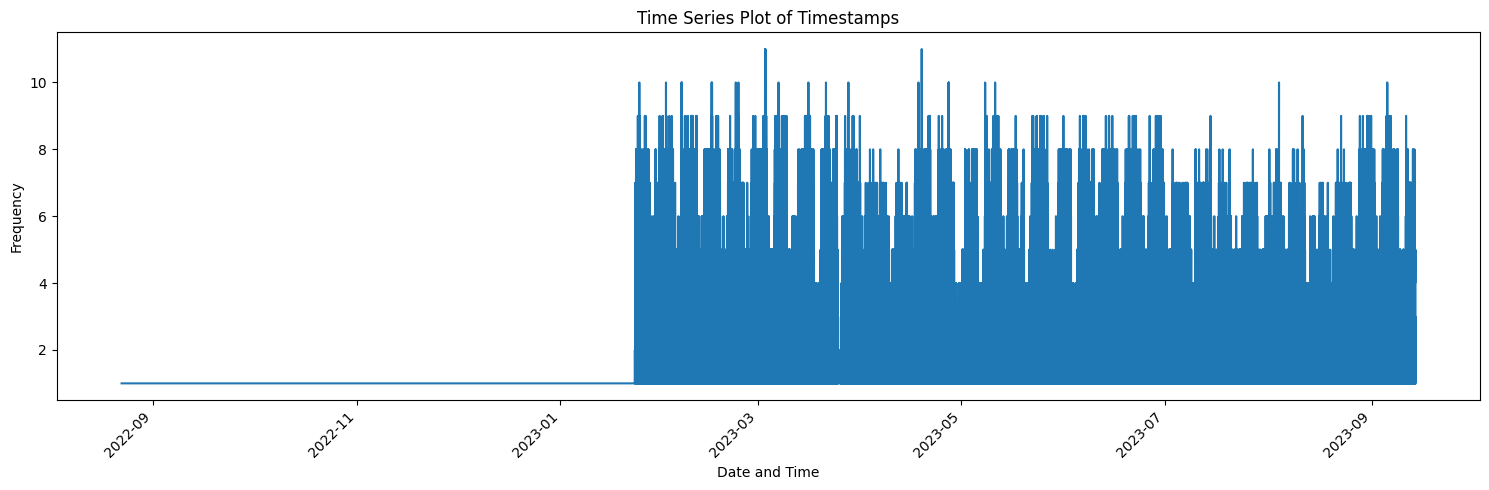

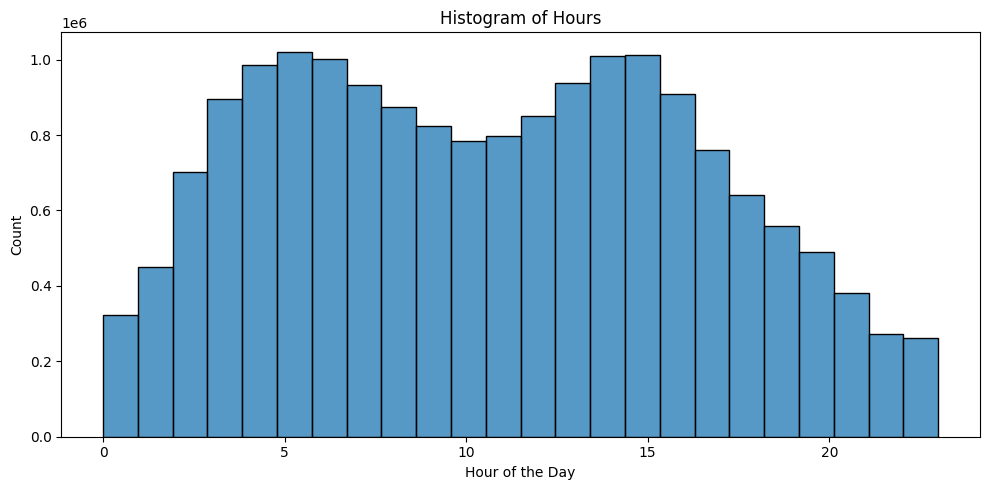

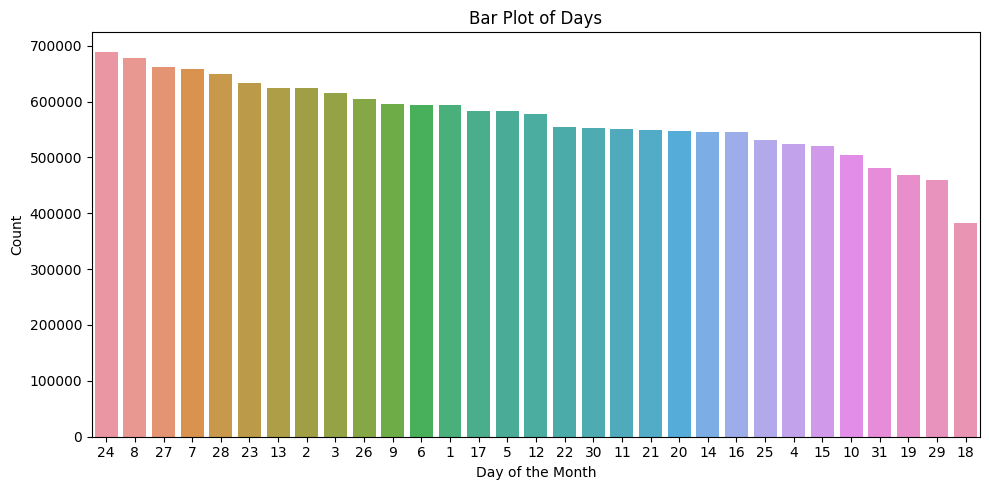

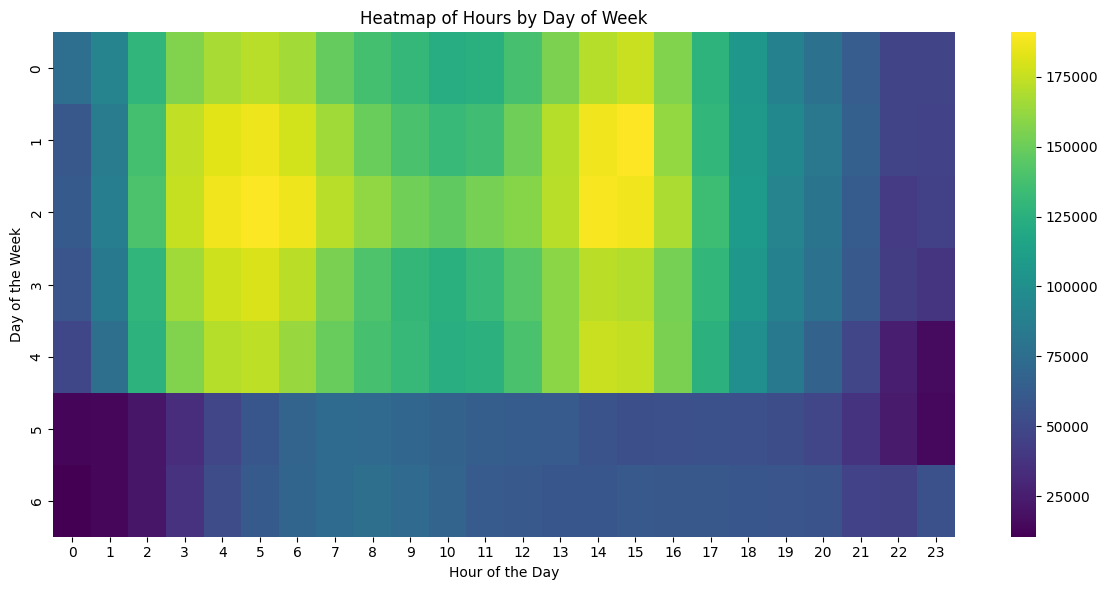

In [7]:
# Convert the 'timestamps_UTC' column to datetime
data['timestamps_UTC'] = pd.to_datetime(data['timestamps_UTC'])

# Extract date and time attributes for visualization
data['date'] = data['timestamps_UTC'].dt.date
data['time'] = data['timestamps_UTC'].dt.time
data['hour'] = data['timestamps_UTC'].dt.hour
data['day'] = data['timestamps_UTC'].dt.day
data['dayofweek'] = data['timestamps_UTC'].dt.dayofweek
data['weekday'] = data['timestamps_UTC'].dt.strftime('%A')

# Time Series Plot
plt.figure(figsize=(15, 5))
data['timestamps_UTC'].value_counts().sort_index().plot()
plt.title('Time Series Plot of Timestamps')
plt.xlabel('Date and Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram of Hours
plt.figure(figsize=(10, 5))
sns.histplot(data['hour'], bins=24, kde=False)
plt.title('Histogram of Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar Plot of Days
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='day', order = data['day'].value_counts().index)
plt.title('Bar Plot of Days')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Heatmap of Hours by Day
heatmap_data = data.pivot_table(index='dayofweek', columns='hour', values='timestamps_UTC', aggfunc='count').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Hours by Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

## Explore Geographical Data

In [8]:
print(data[['lat', 'lon']].describe())

                lat           lon
count  1.767927e+07  1.767927e+07
mean   5.087641e+01  4.228568e+00
std    3.133396e-01  5.981553e-01
min    4.829568e+01  1.750491e-01
25%    5.077065e+01  3.715411e+00
50%    5.100253e+01  3.873272e+00
75%    5.108688e+01  4.535240e+00
max    5.285706e+01  8.045492e+00


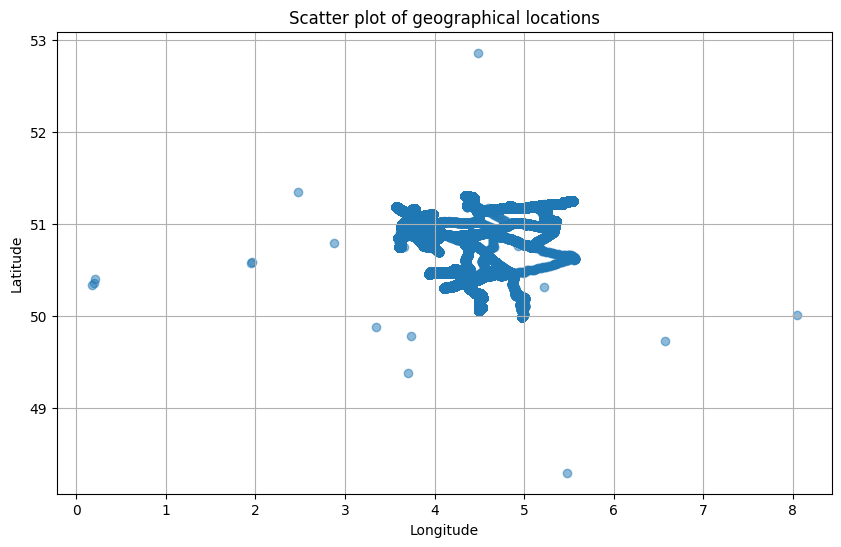

In [9]:
# Plotting the geographic data points
plt.figure(figsize=(10, 6))
plt.scatter(data['lon'], data['lat'], alpha=0.5)
plt.title('Scatter plot of geographical locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

This code will cause memory out of stock

In [10]:
# # Earth's radius in kilometers
# earth_radius = 6371

# # Convert 1km to radians for use in DBSCAN
# eps_radians = 1 / earth_radius 

# # Initialize DBSCAN with the radius in radians (equivalent to 1km)
# db = DBSCAN(eps=eps_radians, min_samples=5, algorithm='ball_tree', metric='haversine')

# # Convert latitude and longitude from degrees to radians for use in haversine formula
# coords = data[['lat', 'lon']].apply(np.radians)

# # Fit the DBSCAN model
# clusters = db.fit_predict(coords)

# # Plot the clusters
# plt.figure(figsize=(10, 6))
# plt.scatter(data['lon'], data['lat'], c=clusters, cmap='viridis', alpha=0.5)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('DBSCAN clustering of Geographical Data Points')
# plt.grid(True)
# plt.show()

## Explore Based on Train ID

In [11]:
# Calculate the number of unique trains and the occurrence of each train ID
unique_trains = data['mapped_veh_id'].nunique()
train_id_counts = data['mapped_veh_id'].value_counts()

(unique_trains, train_id_counts)

(92,
 mapped_veh_id
 172.0    400744
 136.0    374977
 186.0    352154
 177.0    340519
 142.0    300925
           ...  
 107.0     76849
 123.0     74752
 179.0     52754
 105.0     49539
 127.0     15694
 Name: count, Length: 92, dtype: int64)

In [12]:
# Filter the dataset for train ID 181
train_181_data = data[data['mapped_veh_id'] == 181]

# Perform descriptive statistics on train 181 data
train_181_description = train_181_data.describe()

train_181_description

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,hour,day,dayofweek
count,2.654940e+05,265494.0,265494,265494.000000,265494.000000,265494.000000,265317.000000,265494.000000,265317.000000,265494.000000,265317.000000,265494.000000,265317.000000,265494.000000,265317.000000,265494.000000,265494.000000,265494.000000
mean,8.848261e+06,181.0,2023-05-17 20:16:38.148101376,50.957637,3.816460,35.174235,27.907745,284.628696,259.643062,920.205032,931.975304,79.398981,80.287008,75.758687,79.009452,10.246277,15.884977,2.335104
min,0.000000e+00,181.0,2023-01-23 08:28:54,50.697195,3.575034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,4.418460e+06,181.0,2023-03-10 19:56:23.750000128,50.851948,3.645639,27.000000,17.000000,238.000000,210.000000,798.000000,798.000000,81.000000,79.000000,76.000000,76.000000,5.000000,8.000000,1.000000
50%,8.883502e+06,181.0,2023-05-22 16:11:18.500000,51.006680,3.756488,37.000000,28.000000,258.000000,231.000000,801.000000,801.000000,82.000000,85.000000,79.000000,84.000000,10.000000,16.000000,2.000000
75%,1.327826e+07,181.0,2023-07-18 20:03:47.750000128,51.035863,3.813487,43.000000,38.000000,358.000000,324.000000,839.000000,844.000000,84.500000,87.000000,83.000000,87.000000,15.000000,24.000000,4.000000
max,1.767851e+07,181.0,2023-09-13 21:39:10,51.246158,5.541946,83.000000,75.000000,679.000000,665.000000,2060.000000,2084.000000,98.000000,97.000000,103.000000,105.000000,23.000000,31.000000,6.000000
std,5.104688e+06,0.0,NaN,0.128082,0.336142,12.094604,12.993537,100.209719,88.108085,372.015874,371.940846,11.747811,12.576713,13.671389,14.494313,5.666087,8.851558,1.736596
